In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd

ab_animal = pd.read_excel('/content/drive/MyDrive/[프로젝트]pythondata_2025/abandon.xlsx')
ab_animal = ab_animal.rename(columns={'Unnamed: 0': '지역'})

# 결과 확인
print(ab_animal.head(20))



         지역    2019    2020    2021    2022    2023    2024
0     서울특별시    7309    6206    5443    4712    5152    4696
1     부산광역시    8108    7486    6765    6092    5354    5072
2     대구광역시    5493    5054    4520    4470    4580    4423
3     인천광역시    6800    6666    5938    5799    5769    5658
4     광주광역시    3845    3578    3297    3148    3054    2568
5   세종특별자치시     494     330     539     438     587     468
6     대전광역시    4854    3241    2125    1796    1754    1597
7     울산광역시    3075    3350    2940    2971    2952    2917
8       경기도   27967   26985   23856   21265   21728   20919
9   강원특별자치도    6177    5521    5536    5601    5779    5182
10     충청북도    4914    4795    4246    4215    4563    4296
11     충청남도    8475    8866    8294    7764    8506    8836
12  전북특별자치도    7845    8843    8540    8533    8989    8702
13     전라남도    7702    8429    8831    9307    9175    8791
14     경상북도    9144    9834    9444    9377    8583    8690
15     경상남도   14150   13712   11971   12

In [2]:
crime = pd.read_csv('/content/drive/MyDrive/[프로젝트]pythondata_2025/시도별_총범죄건수_2019_2023.csv')
crime= crime.rename(columns={'Unnamed: 0': '지역'})
print(crime.head(30))

         지역    2019    2020    2021    2022    2023
0     서울특별시  305909  290816  252289  267778  275974
1     부산광역시  119267  120095  105737  112080  114070
2     대구광역시   75707   72171   67795   66441   67044
3     인천광역시   93347   91257   80589   84888   92690
4     광주광역시   44102   43179   39203   38408   41969
5     대전광역시   45047   44426   39711   43200   43366
6     울산광역시   34128   31834   31015   27385   31873
7   세종특별자치시    6095    6251    5921    6525    7637
8       경기도  385160  383565  347967  348930  378380
9   강원특별자치도   34924   34297   31959   30931   45654
10     충청북도   35876   35466   31904   32223   42324
11     충청남도   51259   51218   44267   48033   66530
12  전북특별자치도   43730   43674   39926   40549   51026
13     전라남도   37825   36375   32526   34333   64778
14     경상북도   64400   62057   55358   56288   70426
15     경상남도   89403   88808   82219   82844   97000
16  제주특별자치도   27594   28652   25903   26757   27975


In [3]:
population = pd.read_excel('/content/drive/MyDrive/[프로젝트]pythondata_2025/시도별_인구수_2019_2023.xlsx')
population = population.rename(columns={'Unnamed: 0': '지역'})
print(population.head())


      지역   2019   2020   2021   2022   2023
0  서울특벽시  9,657  9,618  9,508  9,421  9,400
1  부산광역시  3,381  3,356  3,334  3,303  3,284
2  대구광역시  2,437  2,414  2,396  2,372  2,360
3  인천광역시  2,952  2,951  2,950  2,975  3,009
4  광주광역시  1,489  1,480  1,476  1,470  1,463


In [4]:
# ab_animal, crime 모두 열 이름을 문자열로 바꿈.
ab_animal.columns = ab_animal.columns.map(str)
crime.columns = crime.columns.map(str)


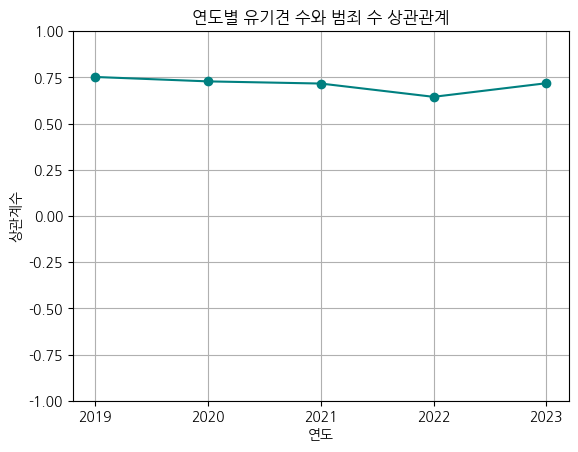

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도 리스트
years = ['2019', '2020', '2021', '2022', '2023']

# 상관계수 계산 딕셔너리
correlations = {}

# 각 연도에 대해 상관계수 계산
for year in years:
    # 병합: 유기견 수와 범죄 수를 지역을 기준으로 병합
    df = pd.merge(ab_animal[['지역', year]], crime[['지역', year]], on='지역', suffixes=('_유기견', '_범죄'))

    # 상관계수 계산
    corr = df[f'{year}_유기견'].corr(df[f'{year}_범죄'])
    correlations[year] = corr

# 상관계수 시각화
plt.plot(correlations.keys(), correlations.values(), marker='o', color='teal')
plt.title("연도별 유기견 수와 범죄 수 상관관계")
plt.xlabel("연도")
plt.ylabel("상관계수")
plt.ylim(-1, 1)  # 상관계수는 -1에서 1 사이의 값이므로
plt.grid(True)
plt.show()



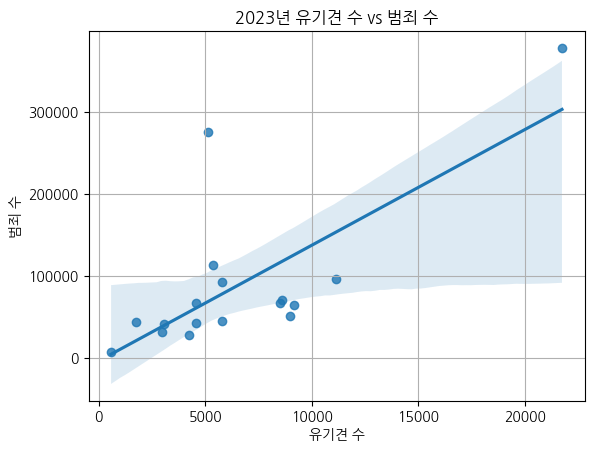

In [12]:
#유기견vs범죄 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

#시각화
sns.regplot(data=df, x=f'{year}_유기견', y=f'{year}_범죄')
plt.title(f"{year}년 유기견 수 vs 범죄 수")
plt.xlabel("유기견 수")
plt.ylabel("범죄 수")
plt.grid(True)
plt.show()


In [12]:
#p값 r값 구하기
from scipy.stats import pearsonr

years = ['2019', '2020', '2021', '2022', '2023']
for year in years:
    merged = pd.merge(ab_animal[['지역', year]], crime[['지역', year]], on='지역', suffixes=('_유기견', '_범죄'))
    r, p = pearsonr(merged[f'{year}_유기견'], merged[f'{year}_범죄'])
    print(f"{year}년 ▶ 상관계수 r = {r:.3f}, p값 = {p:.4f}")

2019년 ▶ 상관계수 r = 0.752, p값 = 0.0005
2020년 ▶ 상관계수 r = 0.728, p값 = 0.0009
2021년 ▶ 상관계수 r = 0.716, p값 = 0.0012
2022년 ▶ 상관계수 r = 0.644, p값 = 0.0052
2023년 ▶ 상관계수 r = 0.718, p값 = 0.0012


In [14]:
print(df.head())

      지역  2023_유기견  2023_범죄
0  서울특별시      5152   275974
1  부산광역시      5354   114070
2  대구광역시      4580    67044
3  인천광역시      5769    92690
4  광주광역시      3054    41969
